In [25]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import hilbert
from pyhht.emd import EMD
from pyhht.visualization import plot_imfs

In [26]:
# Constants
f0 = 440  # frequency of A4 in Hz
t = np.linspace(0, 1, 44100, False)  # 1 second at 44100 samples per second



In [27]:
# Scale degree formulas for each chord quality
chords = {
    "Maj9": [0, 4, 7, 11, 14],
    "6/9": [0, 4, 7, 9, 14],
    "add9": [0, 4, 7, 14],
    "Maj7": [0, 4, 7, 11],
    "Half Dim M7b5": [0, 3, 6, 11],
   "7sus4": [0, 5, 7, 10],
    "7th": [0, 4, 7, 10],
    "add4": [0, 4, 5, 7],
    "Maj6": [0, 4, 7, 9],
    "sus4": [0, 5, 7],
    "sus2": [0, 2, 7],
    "+ (aug)": [0, 4, 8],
    "Major": [0, 4, 7],
    "min": [0, 3, 7],
    "min6": [0, 3, 7, 9],
    "min7": [0, 3, 7, 10],
    "mMaj7": [0, 3, 7, 11],
    "m9": [0, 3, 7, 10, 14],
    "m9b5": [0, 3, 6, 10, 14],
    "mMaj9": [0, 3, 7, 11, 14],
    "Dim": [0, 3, 6],
    "min(add2)": [0, 2, 3, 7],
    "Dim 7": [0, 3, 6, 9],
    "7b5": [0, 4, 6, 10],
    "7#5": [0, 4, 8, 10],
    "m7#5": [0, 3, 8, 10],
    "9#5": [0, 4, 8, 10, 14],
    "Dom9": [0, 4, 7, 10, 14],
    "9b5": [0, 4, 6, 10, 14],
    "min(add9)": [0, 3, 7, 14],
    "11b9": [0, 4, 7, 10, 13, 17],
    "Dom11": [0, 4, 7, 10, 14, 17],
    "Maj11": [0, 4, 7, 11, 14, 17],
    "min11": [0, 3, 7, 10, 14, 17],
    "Maj13": [0, 4, 7, 11, 14, 17, 21],
    "Dom13": [0, 4, 7, 10, 14, 17, 21],
    "min13": [0, 3, 7, 10, 14, 17, 21],
    "13#11": [0, 4, 7, 10, 14, 18, 21]
}

Mode 8, Iteration 600
0 minima > 0; 7 maxima < 0.
Mode 8, Iteration 800
0 minima > 0; 7 maxima < 0.
Mode 8, Iteration 1000
0 minima > 0; 7 maxima < 0.


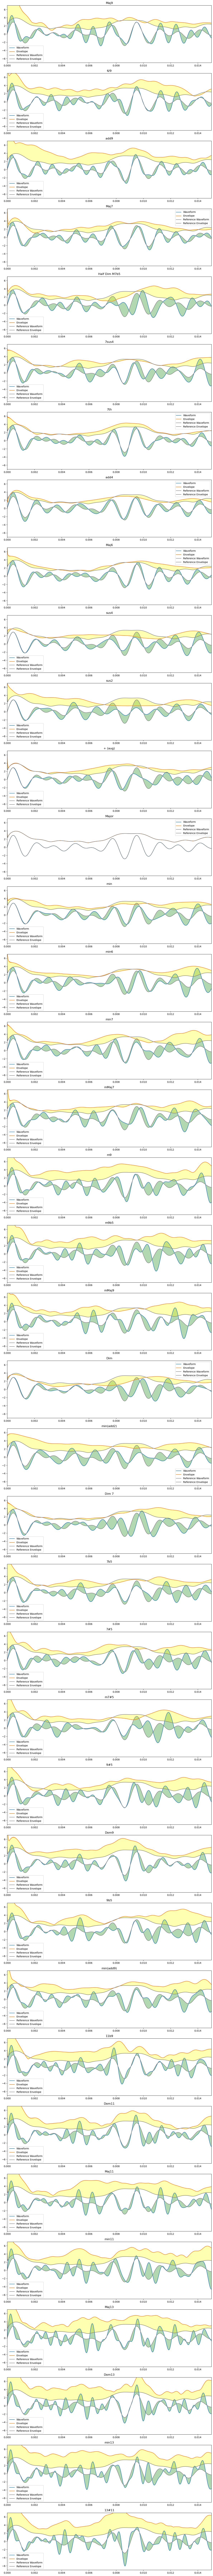

In [28]:
# Generate and plot the combined waveform and its envelope for each chord quality
plt.figure(figsize=(12, 36 * 4))  # Multiply the height by 4

# Generate waveforms for the reference chord
ref_waves = []
for n in chords["Major"]:
    f = f0 * 2**(n/12)  # frequency of the note
    wave = np.sin(2 * np.pi * f * t)  # waveform of the note
    ref_waves.append(wave)

# Combine the waveforms for the reference chord
ref_combined_wave = sum(ref_waves)

# Decompose the signal into IMFs for the reference chord
ref_decomposer = EMD(ref_combined_wave)
ref_imfs = ref_decomposer.decompose()

# Apply the Hilbert transform to each IMF and sum the absolute values to obtain the envelope for the reference chord
ref_envelope = sum(np.abs(hilbert(imf)) for imf in ref_imfs)

for i, (name, scale_degrees) in enumerate(chords.items()):
    # Generate waveforms for each note in the chord
    waves = []
    for n in scale_degrees:
        f = f0 * 2**(n/12)  # frequency of the note
        wave = np.sin(2 * np.pi * f * t)  # waveform of the note
        waves.append(wave)

    # Combine the waveforms
    combined_wave = sum(waves)

    # Decompose the signal into IMFs
    decomposer = EMD(combined_wave)
    imfs = decomposer.decompose()

    # Apply the Hilbert transform to each IMF and sum the absolute values to obtain the envelope
    envelope = sum(np.abs(hilbert(imf)) for imf in imfs)

    # Plot the combined waveform and its envelope
    plt.subplot(len(chords), 1, i + 1)
    plt.plot(t, combined_wave, label='Waveform')
    plt.plot(t, envelope, label='Envelope')
    plt.plot(t, ref_combined_wave, label='Reference Waveform', color='grey')
    plt.plot(t, ref_envelope, label='Reference Envelope', color='grey')
    plt.fill_between(t, combined_wave, ref_combined_wave, color='green', alpha=0.3)
    plt.fill_between(t, envelope, ref_envelope, color='yellow', alpha=0.3)
    plt.xlim(0, 0.015)  # only show the first 0.01 seconds
    plt.ylim(-7, 7)
    plt.title(name)
    plt.legend()

plt.tight_layout()
plt.show()

Mode 8, Iteration 600
0 minima > 0; 7 maxima < 0.
Mode 8, Iteration 800
0 minima > 0; 7 maxima < 0.
Mode 8, Iteration 1000
0 minima > 0; 7 maxima < 0.


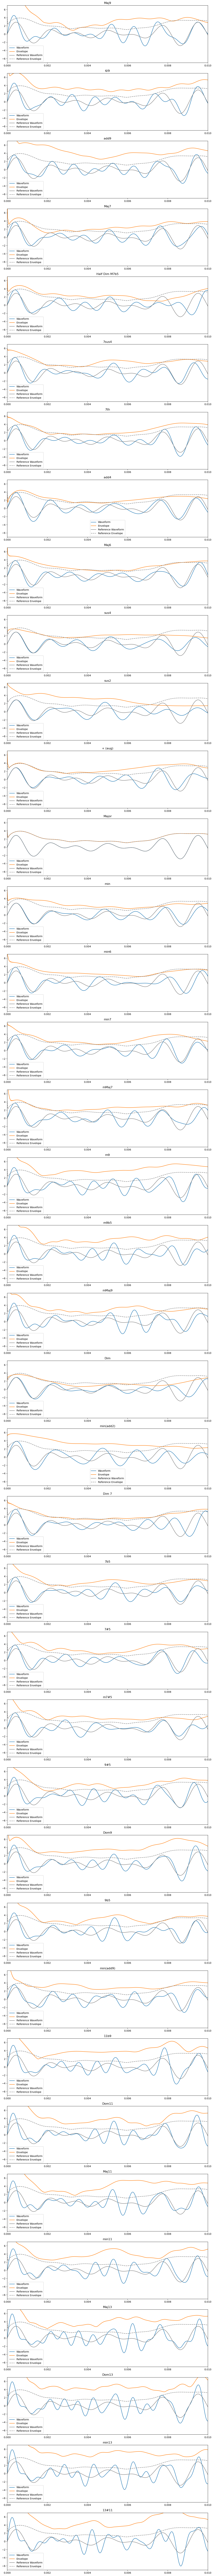

In [29]:
# Generate and plot the combined waveform and its envelope for each chord quality
plt.figure(figsize=(12, 36 * 4))

# Generate reference waveform for "Major" chord quality
ref_waves = []
for n in chords["Major"]:
    f = f0 * 2**(n/12)  # frequency of the note
    wave = np.sin(2 * np.pi * f * t)  # waveform of the note
    ref_waves.append(wave)
ref_combined_wave = sum(ref_waves)
ref_decomposer = EMD(ref_combined_wave)
ref_imfs = ref_decomposer.decompose()
ref_envelope = sum(np.abs(hilbert(imf)) for imf in ref_imfs)

for i, (name, scale_degrees) in enumerate(chords.items()):
    # Generate waveforms for each note in the chord
    waves = []
    for n in scale_degrees:
        f = f0 * 2**(n/12)  # frequency of the note
        wave = np.sin(2 * np.pi * f * t)  # waveform of the note
        waves.append(wave)

    # Combine the waveforms
    combined_wave = sum(waves)

    # Decompose the signal into IMFs
    decomposer = EMD(combined_wave)
    imfs = decomposer.decompose()

    # Apply the Hilbert transform to each IMF and sum the absolute values to obtain the envelope
    envelope = sum(np.abs(hilbert(imf)) for imf in imfs)

    # Plot the combined waveform and its envelope
    plt.subplot(len(chords), 1, i + 1)
    plt.plot(t, combined_wave, label='Waveform')
    plt.plot(t, envelope, label='Envelope')
    plt.plot(t, ref_combined_wave, color='grey', label='Reference Waveform')
    plt.plot(t, ref_envelope, color='grey', linestyle='--', label='Reference Envelope')
    plt.xlim(0, 0.01)  # only show the first 0.01 seconds
    plt.ylim(-7, 7)
    plt.title(name)
    plt.legend()

plt.tight_layout()
plt.show()